<a href="https://colab.research.google.com/github/gabrielnichio/Validation-Metrics-for-Classifications/blob/main/validation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation Metrics

I created this notebook to study and practice about validation metrics in classification predictions.

Dataset contains data about lung cancer: https://www.kaggle.com/datasets/samuelotiattakorah/lung-cancer-data/data.

The objective is to predict whether a person has Lung Cancer or not.

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('/content/lung-cancer-survey.csv')

In [21]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [23]:
data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


# Data Manipulation

I'm not going to transform the data to apply one-hot-encoding and other stuff because the objective here is to study validation metrics only.

In [24]:
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 2})

In [25]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Dividing the dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = data.drop(columns='LUNG_CANCER')
y = data['LUNG_CANCER']

In [28]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, random_state=5, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, stratify=y)

# Classification Model

I'll create a simple classification model using random forest.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier(random_state=5, max_depth=10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=5)

In [31]:
y_pred = model.predict(x_val)

# Accuracy

The first and most simple evaluation metric is the Accuracy. It refers to how much the model could predict right.

In [32]:
print(f'Model Accuracy: {model.score(x_val, y_val)}')

Model Accuracy: 0.8939393939393939


Although is a very good accuracy value, this is not enought. We are talking about cancer, so we need to check if we are predicting both classes ('YES', 'NO') right.

# Confusion Matrix

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

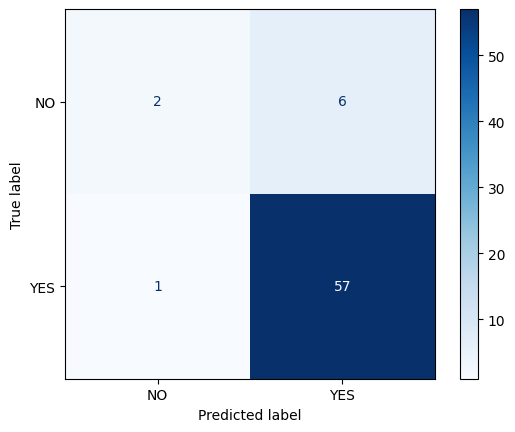

In [36]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues');